# Understanding the API

In [46]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
api_key=os.environ.get('APIKEY')
site_id=os.environ.get('SITEID')

## Site details

In [14]:
url=f"https://monitoringapi.solaredge.com/site/{site_id}/details?api_key={api_key}"

In [16]:
response=requests.get(url)

In [20]:
response.json()

{'details': {'id': 1927644,
  'name': 'Martin Alexandersson',
  'accountId': 113092,
  'status': 'Active',
  'peakPower': 9.0,
  'lastUpdateTime': '2020-11-22',
  'installationDate': '2020-11-04',
  'ptoDate': None,
  'notes': '',
  'type': 'Optimizers & Inverters',
  'location': {'country': 'Sweden',
   'city': 'Hjälteby',
   'address': 'SUNDSBY KILE 131',
   'address2': '',
   'zip': '471 72',
   'timeZone': 'Europe/Stockholm',
   'countryCode': 'SE'},
  'primaryModule': {'manufacturerName': 'Suntech Power',
   'modelName': 'STP320B-53/ZBE',
   'maximumPower': 320.0,
   'temperatureCoef': -0.38},
  'uris': {'DETAILS': '/site/1927644/details',
   'DATA_PERIOD': '/site/1927644/dataPeriod',
   'OVERVIEW': '/site/1927644/overview'},
  'publicSettings': {'isPublic': False}}}

In [21]:
## Site energy

In [51]:
url=f"https://monitoringapi.solaredge.com/site/{site_id}/energy?timeUnit=QUARTER_OF_AN_HOUR&endDate=2020-11-23&startDate=2020-11-21&api_key={api_key}"
response=requests.get(url)
data_dict = response.json()
df = pd.DataFrame(data=data_dict['energy']['values'])
df.set_index('date', inplace=True)
df.dropna(inplace=True)
unit = data_dict['energy']['unit']

Text(0, 0.5, 'Wh')

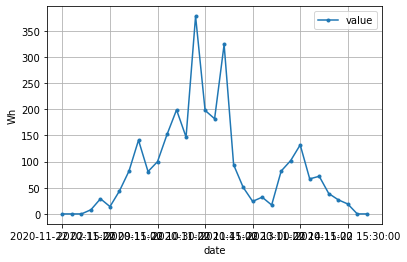

In [52]:
fig,ax=plt.subplots()
df.plot(y='value',style='.-', ax=ax)
ax.grid(True)
ax.set_ylabel(unit)